#                                   Atlantic Hurricane Analysis



# Introduction
This notebook explores the data about **[category 4](https://en.wikipedia.org/wiki/List_of_Category_4_Atlantic_hurricanes)** and **[category 5](https://en.wikipedia.org/wiki/List_of_Category_5_Atlantic_hurricanes)** Atlantic hurricanes.

In [1]:
# Import Libraries
import pandas as pd #Data Wrangling
import numpy as np # Statistical calculations
import seaborn as sns # Plotting
from scipy.stats import poisson, probplot, nbinom # To fit data the Distribution
import matplotlib.pyplot as plt # plotting
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

# Reading the Datasets

In [2]:
# read  the csv file for category 4 data
category_4 = pd.read_csv('category_4.csv')

# Displays only the first 5 rows.
category_4.head()

,name,decade,year,month,windspeed_mph,pressure_mbar
0,Hurricane #3,1851,1853,August,150,924
1,"""1856 Last Island Hurricane""",1851,1856,August,150,934
2,Hurricane #6,1861,1866,September,140,938
3,Hurricane #7,1871,1878,September,140,938
4,Hurricane #2,1871,1880,August,150,931


In [3]:
# read  the csv file for category 5 data
category_5 = pd.read_csv('category_5.csv')

# Displays only the first 5 rows.
category_5.head()

,name,decade,year,month,windspeed_mph,pressure_mbar
0,Cuba,1921,1924,October,165,910
1,San Felipe IIOkeechobee,1921,1928,September,160,929
2,Bahamas,1931,1932,September,160,921
3,Cuba,1931,1932,November,175,915
4,Cuba–Brownsville,1931,1933,August,160,930


# Exploring Category 4 Hurricanes

### Calculating descriptive statistics for Category 4 Hurricanes

In [4]:
category_4.describe()[['windspeed_mph', 'pressure_mbar']]

,windspeed_mph,pressure_mbar
count,119.000000,119.000000
mean,142.016807,939.378151
std,7.980892,9.682232
min,130.000000,916.000000
25%,140.000000,933.000000
50%,140.000000,939.000000
75%,150.000000,945.000000
max,155.000000,975.000000


### Visualizing Number of category 4 hurricane occurrences in each month

[Text(0.5,1,'Number of hurricanes in each month')]

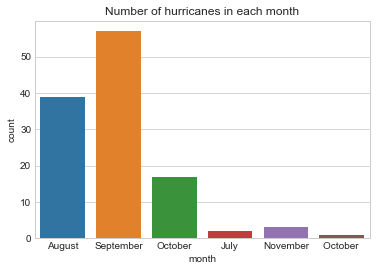

In [5]:
fig, ax1 = plt.subplots()
sns.countplot('month',data=category_4,ax=ax1)
ax1.set(title='Number of hurricanes in each month')

- The above plot shows the distribution of the no. of occurrences of category 4 hurricanes across all months.
- We can conclude that the maximum no. of category 4 hurricanes occur in the month of September and the least have occurred in October. 
- There have been no occurrences of category 4 hurricanes in Jan, Feb, Mar, April, May, June or Dec. Accordingly, we can possibly assume that category 4 hurricanes don't occur in the first part of the year and are most active only in the third quarter of the year.

### Visualizing Number of category 4 hurricane occurrences in each decade

[Text(0.5,1,'Number of hurricanes in each decade')]

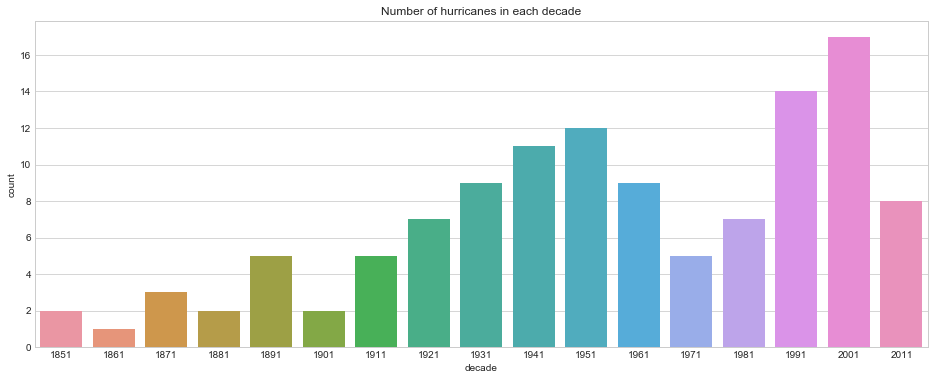

In [6]:
fig, ax2 = plt.subplots(figsize=(16,6))
sns.countplot('decade',data=category_4,ax=ax2)
ax2.set(title='Number of hurricanes in each decade')

- The above plot shows the distribution of the no. of occurrences of category 4 hurricanes across all decades
- We can conclude that the number of occurrences of Category 4 hurricane has increased slightly every decade in most of the cases. 
- And, the no. of hurricanes is increasing by a good number every century. Time to realize the seriousness of global warming probably?
- Most numbers of category 4 hurricanes have occurred between 2001-2010 and the least between 1861 and 1870

### Univariate Analysis of Windspeeds in Category 4 Hurricanes

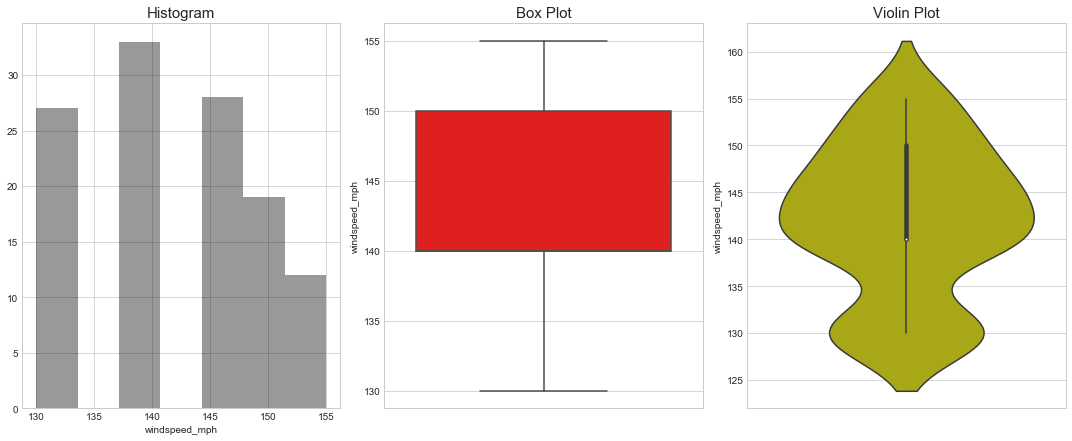

In [7]:
fig, ax = plt.subplots(1,3,figsize=(15,6))
sns.distplot(category_4['windspeed_mph'],kde=False,ax=ax[0],color='black')
sns.boxplot(y='windspeed_mph', data=category_4,ax=ax[1],color='r')
sns.violinplot(y=category_4['windspeed_mph'],ax=ax[2],color='y')
fig.tight_layout()

for i, title in enumerate(['Histogram', 'Box Plot', 'Violin Plot']):
    ax[i].set_title(title, fontsize=15)

####  From the above plots, we can conclude the following things about the Windspeeds for Category 4 hurricanes:

- The maximum wind speed is 155 mph.
- The minimum wind speed is 130 mph.
- The median of windspeeds is 140 mph.
- We can analyze 4 Quartiles from the above plots, namely Q1, Q2, Q3, Q4.
- In Q1, windspeeds range from 130-140 mph.
- In Q2, all the wind speeds are approximately 140 mph. From this, we can conclude that at least 25% of the hurricanes in Category_4 have the wind speed of approx 140 mph.
- In Q3, windspeeds range from 140 - 150 mph.
- In Q4, windspeeds range from 150 to 155 mph. 
- The interquartile range, i.e. at least 50% of the hurricanes in Category_4 have the wind speed between 140 and 150 mph.

### Univariate Analysis of pressure in Category 4 Hurricanes

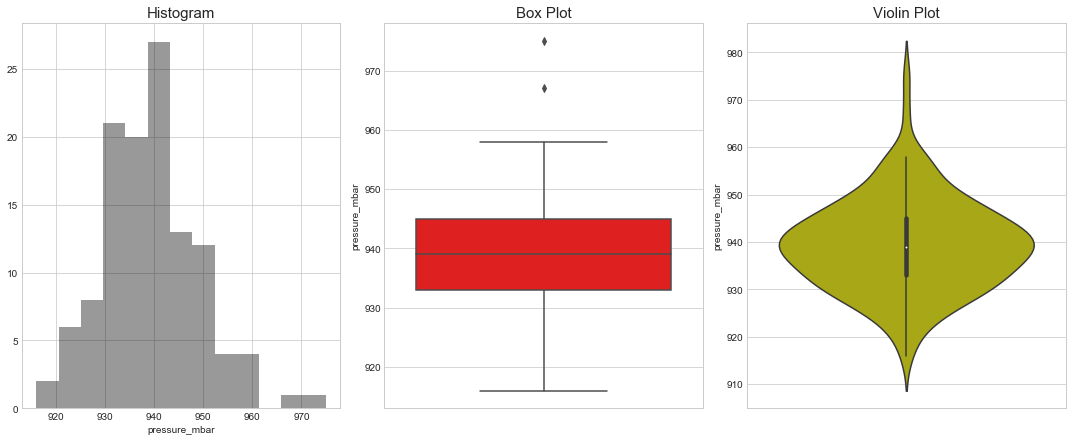

In [8]:
fig, ax = plt.subplots(1,3,figsize=(15,6))
sns.distplot(category_4['pressure_mbar'],kde=False,ax=ax[0],color='black')
sns.boxplot(y='pressure_mbar', data=category_4,ax=ax[1],color='r')
sns.violinplot(y=category_4['pressure_mbar'],ax=ax[2],color='y')
fig.tight_layout()

for i, title in enumerate(['Histogram', 'Box Plot', 'Violin Plot']):
    ax[i].set_title(title, fontsize=15)

####  From the above plots, we can conclude the following things about the Pressure for Category 4 hurricanes:

- A couple of outliers can be seen from the above plots, which means that there were a couple of Hurricanes that broke the stereotypical range of pressure and were abnormal, hence the maximum pressure is so high.
- The maximum pressure is ~ 975 mbar.
- The minimum pressure is ~ 915 mbar.
- The median of pressure is ~ 939 mbar.
- We can analyze 4 Quartiles from the above plots, namely Q1, Q2, Q3, Q4.
- In Q1, pressure ranges from 915-935 mbar.
- In Q2, pressure ranges from 935 - 939 mbar.
- In Q3, pressure ranges from 939 - 946 mbar. 
- In Q4, pressure ranges from 946 - 958 mbar. 
- The interquartile range, i.e. at least 50% of the hurricanes in Category_4 have the pressure between 935 and 946 mbar

### Bi-variate analysis of pressure and windspeed across years for category 4 hurricanes


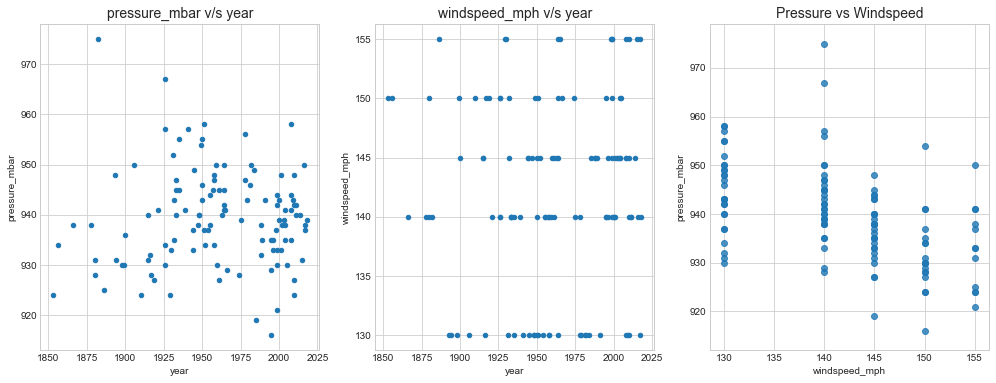

In [9]:
fig, ax = plt.subplots(1,3, figsize=(17,6))
for i,col in enumerate(['pressure_mbar','windspeed_mph', '']):
    if i < 2:
        category_4.plot.scatter('year', col, ax=ax[i])
        ax[i].set_title(col+' v/s year', fontsize=14)
    else:
        sns.regplot('windspeed_mph', 'pressure_mbar', data=category_4, fit_reg=False, ax=ax[2])
        ax[i].set_title('Pressure vs Windspeed', fontsize=14)

- The above plots show the relation of the year with pressure and windspeeds of category 4 hurricanes.
- The plot of pressure against years does not show any increase in category 4 hurricane strength.
- The strongest hurricanes with the lowest pressure have occurred in the 1920s and late 1990s.
- Thus, it seems that the global tropical hurricane intensity, frequency, and longevity may not have undergone an increase in recent years.
- And thus, no significant increase in trend is evident.

### Fitting a Poisson Distribution for Category 4 Hurricanes Based on Decades

In [10]:
# Counting the Number of Hurricanes in each Decade
category_4['decade'].value_counts()

2001    17
1991    14
1951    12
1941    11
1931     9
1961     9
2011     8
1921     7
1981     7
1971     5
1911     5
1891     5
1871     3
1851     2
1901     2
1881     2
1861     1
Name: decade, dtype: int64

mu = 7.0

Random varaible = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]



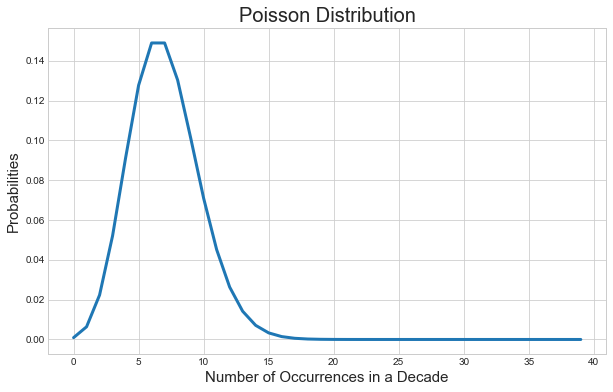

((array([ 3.,  4.,  4.,  5.,  5.,  6.,  6.,  6.,  7.,  7.,  8.,  8.,  9.,
          9., 10., 11., 12.]),
  array([ 1,  2,  2,  2,  3,  5,  5,  5,  7,  7,  8,  9,  9, 11, 12, 14, 17])),
 (1.7724215246636772, -5.511210762331839, 0.9876012472812552))

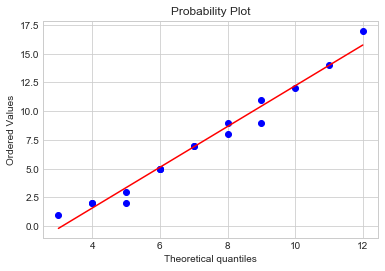

In [11]:
# Calculating the Value of 'mu' for Poisson distribution
# 'mu' is the average number of hurricane occurences in each decade
mu = category_4['decade'].value_counts().mean()
print('mu = {}'.format(mu))
print()

# Initializing the random varibale 'x'
# 'x' can take any value from 0 to infinity. But lets limit it to 100
x = np.arange(0,40,1)
print('Random varaible = {}'.format(x))
print()

# calculating Probabilities based on the probability mass function for the Poisson Distribution.
probs = poisson.pmf(x, mu)

# Plotting the probabilities.
plt.figure(figsize=(10,6))
plt.plot(x, probs, linewidth=3)
plt.title('Poisson Distribution',fontsize=20)
plt.xlabel('Number of Occurrences in a Decade',fontsize=15)
plt.ylabel('Probabilities',fontsize=15)
plt.show()
plt.close()

probplot(category_4['decade'].value_counts(), dist=poisson(mu), plot=plt)

We have plotted a q-q plot here to check the *goodness of fit*. The quantile-quantile or q-q plot is an exploratory graphical device used to check the validity of a distributional assumption for a data set. Clearly, from the above graph, the distribution points are not satisfactorily falling on the linear line which they should for Poisson distribution. Hence, although the distribution of Category_4 hurricanes over decades is close to being a Poisson distribution, it is **not**.

# Exploring Category 5 Hurricanes

### Calculating descriptive statistics for Category 5 Hurricanes

In [12]:
category_5.describe()[['windspeed_mph', 'pressure_mbar']]

,windspeed_mph,pressure_mbar
count,33.000000,33.000000
mean,170.606061,916.090909
std,9.417203,15.077640
min,160.000000,882.000000
25%,160.000000,905.000000
50%,175.000000,918.000000
75%,175.000000,929.000000
max,190.000000,943.000000


### Visualizing Number of category 5 hurricane occurrences in each month

[Text(0.5,1,'Number of hurricanes in each month')]

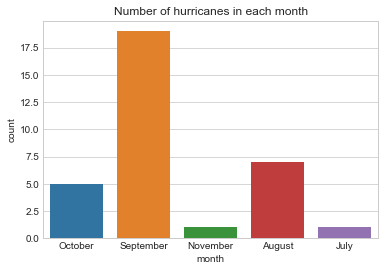

In [13]:
fig, ax1 = plt.subplots()
sns.countplot('month',data=category_5,ax=ax1)

ax1.set(title='Number of hurricanes in each month')

- The above plot shows the distribution of the no. of occurrences of category 5 hurricanes across all months.
- We can conclude that the maximum no. of category 5 hurricanes occur in the month of September and the least have occurred in November. 
- There have been no occurrences of category 4 hurricanes in Jan, Feb, Mar, April, May, June or Dec. Accordingly, we can possibly assume that category 5 hurricanes don't occur in the first part of the year and are most active only in the third quarter of the year

### Visualizing Number of category 5 hurricane occurrences in each decade

[Text(0.5,1,'Number of hurricanes in each decade')]

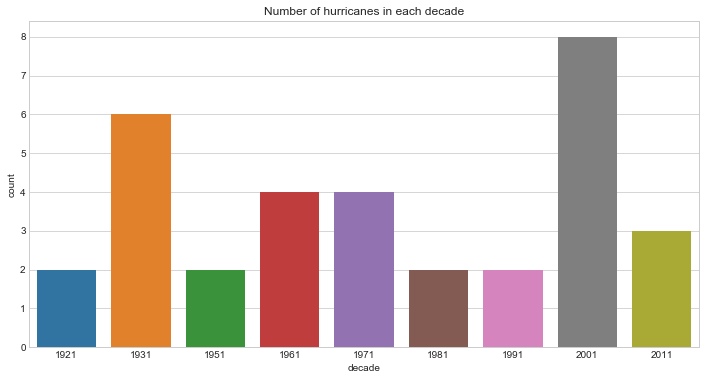

In [14]:
fig, ax2 = plt.subplots(figsize=(12,6))
sns.countplot('decade',data=category_5,ax=ax2)
ax2.set(title='Number of hurricanes in each decade')

- The above plot shows the distribution of the no. of occurrences of category 5 hurricanes across all decades.
- We can conclude that most numbers of hurricanes occurred between 2001-2010 followed by 1931-1941. 
- No. of category 5 hurricanes has remained constant and low in the decade of 1921,1051,1981,1991.
- There we practically no category 5 hurricanes recorded between 1941 to 1951.

### Univariate Analysis of windspeed in Category 5 Hurricanes

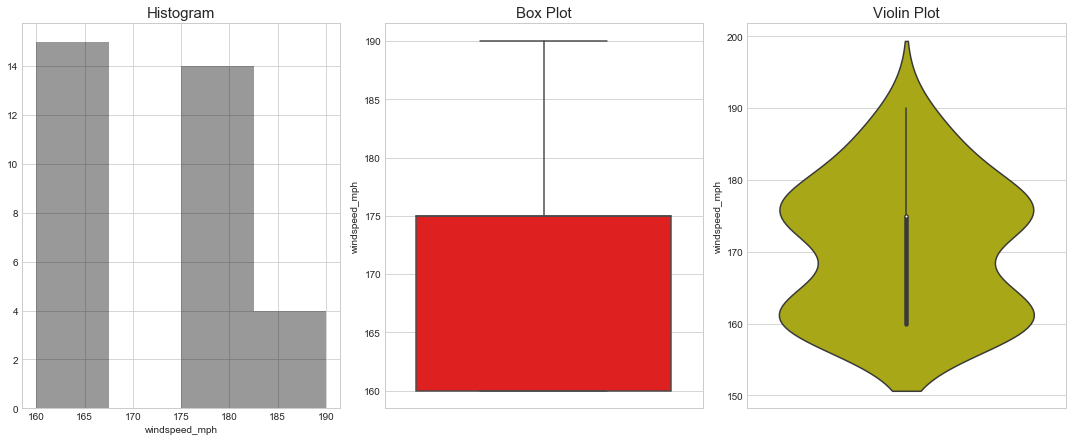

In [15]:
fig, ax = plt.subplots(1,3,figsize=(15,6))
sns.distplot(category_5['windspeed_mph'],kde=False,ax=ax[0],color='black')
sns.boxplot(y='windspeed_mph', data=category_5,ax=ax[1],color='r')
sns.violinplot(y=category_5['windspeed_mph'],ax=ax[2],color='y')
fig.tight_layout()

for i, title in enumerate(['Histogram', 'Box Plot', 'Violin Plot']):
    ax[i].set_title(title, fontsize=15)


####  From the above plots, we can conclude the following things about the Windspeeds for Category 5 hurricanes:

- The maximum windspeed is 190 mph.
- The minimum windspeed is 160 mph.
- The median of windspeeds is 175 mph.
- We can analyze 4 Quartiles from the above plots, namely Q1, Q2, Q3, Q4.
- In Q1, all hurricanes have windspeeds of approx 160 mph.  From this we can conclude that atleast 25% of the hurricanes in Category_5 have the windspeed of approx 160 mph.
- In Q2, windspeeds range from 160 - 175 mph.
- In Q3, all hurricanes have windspeeds of approx 175 mph.  From this we can conclude that atleast 25% of the hurricanes in Category_5 have the windspeed of approx 175 mph.
- In Q4, windspeeds range from 175 to 190 mph. 
- The interquartile range, i.e. atleast 50% of the hurricanes in Category_5 have the windspeed between 160 and 175 mph, but in this case approximately 75% lie in that range.

### Univariate Analysis of pressure in Category 5 Hurricanes

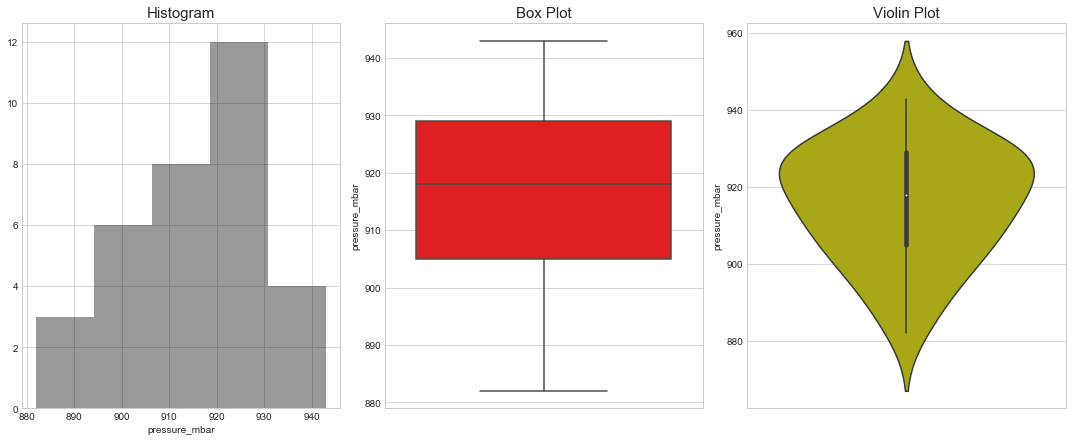

In [16]:
fig, ax = plt.subplots(1,3,figsize=(15,6))
sns.distplot(category_5['pressure_mbar'],kde=False,ax=ax[0],color='black')
sns.boxplot(y='pressure_mbar', data=category_5,ax=ax[1],color='r')
sns.violinplot(y=category_5['pressure_mbar'],ax=ax[2],color='y')
fig.tight_layout()

for i, title in enumerate(['Histogram', 'Box Plot', 'Violin Plot']):
    ax[i].set_title(title, fontsize=15)

####  From the above plots, we can conclude the following things about the Pressure for Category 5 hurricanes:

- The maximum pressure is ~943 mbar.
- The minimum pressure is ~882 mbar.
- The median of pressure is ~918 mbar.
- We can analyze 4 Quartiles from the above plots, namely Q1, Q2, Q3, Q4.
- In Q1, pressure ranges from 882 - 905 mbar.
- In Q2, pressure ranges from 905 - 918 mbar.
- In Q3, pressure ranges from 918 - 929.5 mbar. 
- In Q4, pressure ranges from 929.5 - 943 mbar. 
- The interquartile range, i.e. at least 50% of the hurricanes in Category_5 have the pressure between 905 and 929.5 mph

### Bi-variate analysis of pressure and windspeed across years for category 5 hurricanes


### Scatter Plot Between pressure and windspeed for Catageory 5 hurricanes

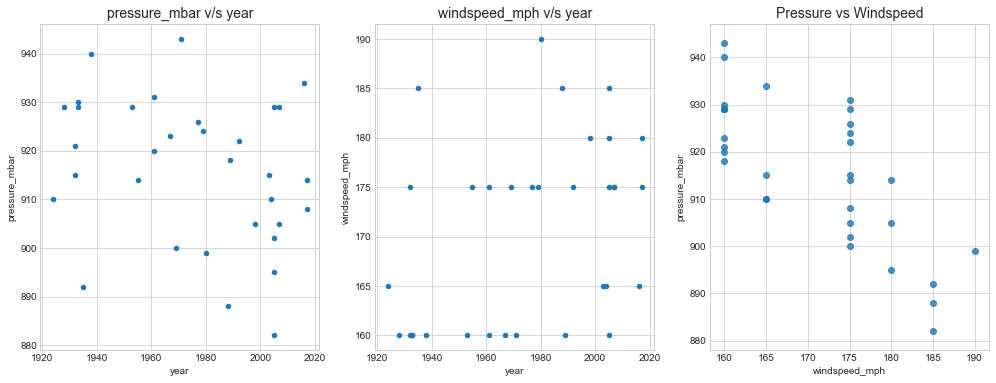

In [17]:
fig, ax = plt.subplots(1,3, figsize=(17,6))
for i,col in enumerate(['pressure_mbar','windspeed_mph', '']):
    if i < 2:
        category_5.plot.scatter('year', col, ax=ax[i])
        ax[i].set_title(col+' v/s year', fontsize=14)
    else:
        sns.regplot('windspeed_mph', 'pressure_mbar', data=category_5, fit_reg=False, ax=ax[2])
        ax[i].set_title('Pressure vs Windspeed', fontsize=14)

- The above plots show the relation of the year with pressure and windspeeds of category 4 hurricanes.
- The plot of pressure against years does not show any increase in category 4 hurricane strength.
- The strongest hurricanes with the lowest pressure have occurred in early 2000s.
- Thus, it seems that the global tropical hurricane intensity, frequency, and longevity may not have undergone an increase in recent years.
- And thus, no significant increase in trend is evident.

### Fitting a Poisson Distribution for Category 5 Hurricanes Based on Decades

In [18]:
# Counting the Number of Hurricanes in each Decade
category_5['decade'].value_counts()

2001    8
1931    6
1971    4
1961    4
2011    3
1981    2
1951    2
1991    2
1921    2
Name: decade, dtype: int64

mu = 3.6666666666666665

Random varaible = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]



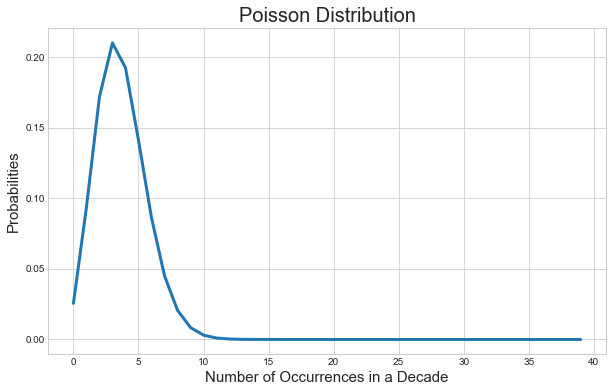

((array([1., 2., 2., 3., 3., 4., 5., 5., 7.]),
  array([2, 2, 2, 2, 3, 4, 4, 6, 8])),
 (1.0511811023622046, -0.0708661417322829, 0.9307261109549351))

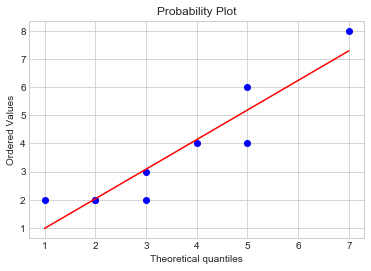

In [19]:
# Calculating the Value of 'mu' for Poisson distribution
# 'mu' is the average number of hurricane occurences in each decade
mu = category_5['decade'].value_counts().mean()
print('mu = {}'.format(mu))
print()

# Initializing the random varibale 'x'
# 'x' can take any value from 0 to infinity. But lets limit it to 100
x = np.arange(0,40,1)
print('Random varaible = {}'.format(x))
print()

# calculating Probabilities based on the probability mass function for the Poisson Distribution.
probs = poisson.pmf(x, mu)

# Plotting the probabilities.
plt.figure(figsize=(10,6))
plt.plot(x, probs, linewidth=3)
plt.title('Poisson Distribution',fontsize=20)
plt.xlabel('Number of Occurrences in a Decade',fontsize=15)
plt.ylabel('Probabilities',fontsize=15)
plt.show()
plt.close()

probplot(category_5['decade'].value_counts(), dist=poisson(mu), plot=plt)


We have plotted a q-q plot here to check the *goodness of fit*. The quantile-quantile or q-q plot is an exploratory graphical device used to check the validity of a distributional assumption for a data set. Clearly, from the above graph, the distribution points are not following the linear line which they should for Poisson distribution and are scattered. Hence, the distribution of Category_5 hurricanes over decades is **not** satisfactorily a Poisson Distribution.

## Generating QQ plot for Negative Binomial distribution

### Category 4 hurricanes

((array([  nan,   15.,  108.,  245.,  408.,  587.,  778.,  980., 1193.,
         1416., 1650., 1897., 2161., 2447., 2767., 3147., 3682.]),
  array([ 1,  2,  2,  2,  3,  5,  5,  5,  7,  7,  8,  9,  9, 11, 12, 14, 17])),
 (nan, nan, nan))

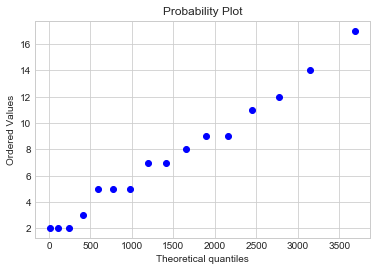

In [29]:
n = np.arange(0,17,1)
p = 0.0063875
probplot(category_4['decade'].value_counts(), dist=nbinom(n,p), plot=plt)

- By q-q above plot, we can conclude that the distribution of hurricanes tends towards being negative binomial distribution as the points follow a linear line. 

### Category 5 hurricanes

((array([ nan,   2.,  10.,  22.,  35.,  51.,  70.,  92., 122.]),
  array([2, 2, 2, 2, 3, 4, 4, 6, 8])),
 (nan, nan, nan))

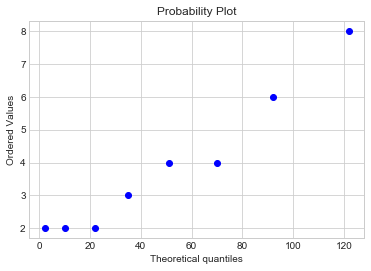

In [28]:
n=np.arange(0,9,1)
p = 0.0934
probplot(category_5['decade'].value_counts(), dist=nbinom(n,p), plot=plt)

- By q-q above plot, we can conclude that the distribution of hurricanes tends towards being negative binomial distribution as the points follow a linear line. 